In [1]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
import re
import itertools as it
import nltk as nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
# from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yaya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [2]:
import pandas as pd

df = pd.read_csv('df_prepro_ced.csv',index_col=['Unnamed: 0'])

In [3]:
df

,hotel,commentaire,note
0,Appi Hotel,appi hôtel éviter absolument chambre faite 6 ...,1
1,Appi Hotel,horrible jamais mettre piedsa banir durgence ...,1
2,Appi Hotel,hotel bruyant miteux quil faut fuir douche wc...,1
3,Appi Hotel,j’ai réservé plus 4 mois l’avance lorsque j’a...,1
4,Appi Hotel,hôtel dont chambres confortables agréables ce...,0
...,...,...,...
2903,Luna park,jai séjourné luna park semaine cet hôtel ami ...,1
2904,Luna park,venons dallemagne après séjour luna park a ré...,1
2905,Luna park,très déçus situé bon quartier lhôtel situé pi...,1
2906,Luna park,voyageurs budget réduit cet hôtel conviendra ...,0


In [4]:
def com_preproc(commentaires):
    ponctuations = '''!()-[]{};:'"\,./?@#$%^&@*_~'''
    pas_de_ponc = ""
    for carac in commentaires:
        if carac not in ponctuations:
            pas_de_ponc = pas_de_ponc + carac
    mots = stopwords.words('french')
    comm_nettoyés = ""
    for mot in pas_de_ponc.split():
        if mot not in mots:
            comm_nettoyés = comm_nettoyés + ' ' + mot
    return comm_nettoyés    

In [7]:
df["commentaire"] = df["commentaire"].apply(com_preproc)

In [8]:
nombre_évaluation = df["note"].value_counts()
nombre_évaluation

0    1637
1    1271
Name: note, dtype: int64

In [9]:
messages_bow = CountVectorizer(analyzer=com_preproc).fit_transform(df['commentaire'])

In [11]:
# text = df.commentaire[0]

# wordcloud = WordCloud().generate(text)
# plt.imshow(wordcloud, interpolation='bilinear', cmap="coolwarm")
# plt.axis("off")
# plt.show()

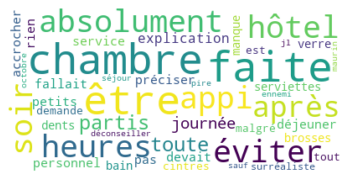

In [14]:
# wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear", cmap="coolwarm")
# plt.axis("off")
# plt.show()

In [12]:
text = " ".join(commentaires for commentaires in df.commentaire)
print ("Il y a {} de mots dans les commentaires pris.".format(len(text)))

Il y a 796995 de mots dans les commentaires pris.


In [13]:
# wordcloud = WordCloud(background_color="white").generate(text)

# # Display the generated image:
# # the matplotlib way:
# plt.imshow(wordcloud, interpolation='bilinear', cmap="coolwarm")
# plt.axis("off")
# plt.show()

In [14]:
comms_bons = df.loc[(df['note'] == 0)]
comms_bons.reset_index(drop=True)
comms_bons

,hotel,commentaire,note
4,Appi Hotel,hôtel dont chambres confortables agréables ce...,0
10,Appi Hotel,petit hôtel paie mine accueil sympa quartier ...,0
16,Appi Hotel,tout dabord accueil personnel tres chaleureux...,0
21,Appi Hotel,we prolongé paris opté hôtel central proximit...,0
22,Appi Hotel,chambres propres rapport qualité prix incompa...,0
...,...,...,...
2897,Luna park,lhôtel horrible lextérieur nest beau lintérie...,0
2898,Luna park,super hôtel propre citytrip court très bons g...,0
2901,Luna park,cet hôtel hôtel simple base propre sûre perso...,0
2902,Luna park,jai séjourné luna park semaine cet hôtel femm...,0


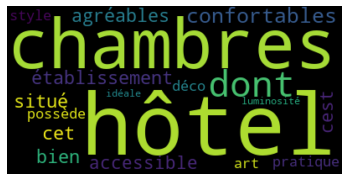

In [18]:
# text_bons = comms_bons.commentaire[4]

# wordcloud = WordCloud().generate(text_bons)
# plt.imshow(wordcloud, interpolation='bilinear', cmap="coolwarm")
# plt.axis("off")
# plt.show()

In [15]:
comms_mauvais = df.loc[(df['note'] == 1)]
comms_mauvais

,hotel,commentaire,note
0,Appi Hotel,appi hôtel éviter absolument chambre faite 6 ...,1
1,Appi Hotel,horrible jamais mettre piedsa banir durgence ...,1
2,Appi Hotel,hotel bruyant miteux quil faut fuir douche wc...,1
3,Appi Hotel,j’ai réservé plus 4 mois l’avance lorsque j’a...,1
5,Appi Hotel,hôtel travaux aucune règles sécurité chambre ...,1
...,...,...,...
2900,Luna park,vois quelques personnes voudraient faire paye...,1
2903,Luna park,jai séjourné luna park semaine cet hôtel ami ...,1
2904,Luna park,venons dallemagne après séjour luna park a ré...,1
2905,Luna park,très déçus situé bon quartier lhôtel situé pi...,1


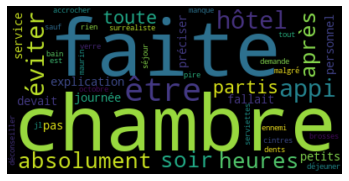

In [20]:
# text_mauvais = comms_mauvais.commentaire[0]

# wordcloud = WordCloud().generate(text_mauvais)
# plt.imshow(wordcloud, interpolation='bilinear', cmap="coolwarm")
# plt.axis("off")
# plt.show()

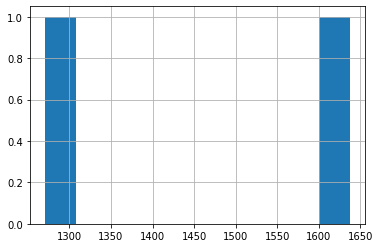

In [16]:
df.note.value_counts().hist()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(messages_bow, df['note'], test_size = 0.20, random_state = 0)

In [18]:
multiNB = MultinomialNB()
multiNB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
import pickle
# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(multiNB, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.6855670103092784


In [ ]:
loaded_model.predict("belle")

In [24]:
#Print the predictions
print(multiNB.predict(X_train))#Print the actual values
print(y_train.values)

[0 0 1 ... 0 0 0]
[1 0 0 ... 0 0 1]


In [25]:
#Print the predictions
print('valeurs prédites: ',multiNB.predict(X_test))#Print Actual Label
print('------------------------------------------------------------------------------------')
print('réelles valeurs: ',y_test.values)

valeurs prédites:  [1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0
 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0
 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1
 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1
 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1
 1 0 0

In [26]:
accuracy_score
pred = multiNB.predict(X_test)
print(classification_report(y_test ,pred ))
print('--------------------------------------')
print('Confusion Matrix: \n', confusion_matrix(y_test,pred))
print('-------------------------------------')
print('Accuracy: ', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73       315
           1       0.69      0.57      0.62       267

    accuracy                           0.69       582
   macro avg       0.69      0.68      0.68       582
weighted avg       0.69      0.69      0.68       582

--------------------------------------
Confusion Matrix: 
 [[247  68]
 [115 152]]
-------------------------------------
Accuracy:  0.6855670103092784
